# Installation of dependencies

In [1]:
pip install gemmi wget matplotlib tqdm ipywidgets

Note: you may need to restart the kernel to use updated packages.


# PDB mirror update (structures only)

In [2]:
%%sh

MIRRORDIR=/home/olico/repositories/mmCIF_PDB
LOGFILE=/home/olico/repositories/mmCIF_PDB_`date +"%Y-%m-%d"`.log
RSYNC=rsync
echo "Log file: " $LOGFILE
SERVER=rsync.ebi.ac.uk::pub/databases/pdb
PORT=873

mkdir -p $MIRRORDIR

${RSYNC} -rlpt -v -z --delete --port=$PORT ${SERVER}/data/structures/divided/mmCIF/ $MIRRORDIR > $LOGFILE 2>/dev/null
echo "finished" 

Log file:  /home/olico/repositories/mmCIF_PDB_2025-07-02.log
finished


# Reading all structures

In [4]:
import gemmi
from tqdm.notebook import tqdm

loaded_count = 0
failed_count = 0

for file_path in tqdm(gemmi.CoorFileWalk("/home/olico/repositories/mmCIF_PDB")) :
  try:
    structure = gemmi.read_structure(file_path)
    loaded_count += 1
  except Exception as e:
    print(f"Failed: {file_path} | Error: {e}")
    failed_count += 1

# prints it without running out of memory
print(f"\n Done! Loaded {loaded_count} files, Failed {failed_count} files")

print(f"Summary: Loaded {loaded_count} files, Failed {failed_count} files")


0it [00:00, ?it/s]

Failed: /home/olico/repositories/mmCIF_PDB/ol/5olg.cif.gz | Error: not an integer: 
Failed: /home/olico/repositories/mmCIF_PDB/pv/7pvv.cif.gz | Error: not an integer: 

✅ Done! Loaded 238266 files, Failed 2 files
Summary: Loaded 238266 files, Failed 2 files


# Disulfide bonds

0it [00:00, ?it/s]

10000 disulfide bonds found so far...
20000 disulfide bonds found so far...
30000 disulfide bonds found so far...
40000 disulfide bonds found so far...
50000 disulfide bonds found so far...
60000 disulfide bonds found so far...
70000 disulfide bonds found so far...
80000 disulfide bonds found so far...
90000 disulfide bonds found so far...
100000 disulfide bonds found so far...
110000 disulfide bonds found so far...
120000 disulfide bonds found so far...
130000 disulfide bonds found so far...
140000 disulfide bonds found so far...
150000 disulfide bonds found so far...
160000 disulfide bonds found so far...
170000 disulfide bonds found so far...
180000 disulfide bonds found so far...
190000 disulfide bonds found so far...
200000 disulfide bonds found so far...
210000 disulfide bonds found so far...
220000 disulfide bonds found so far...
230000 disulfide bonds found so far...
240000 disulfide bonds found so far...
Failed: /home/olico/repositories/mmCIF_PDB/ol/5olg.cif.gz | Error: not an

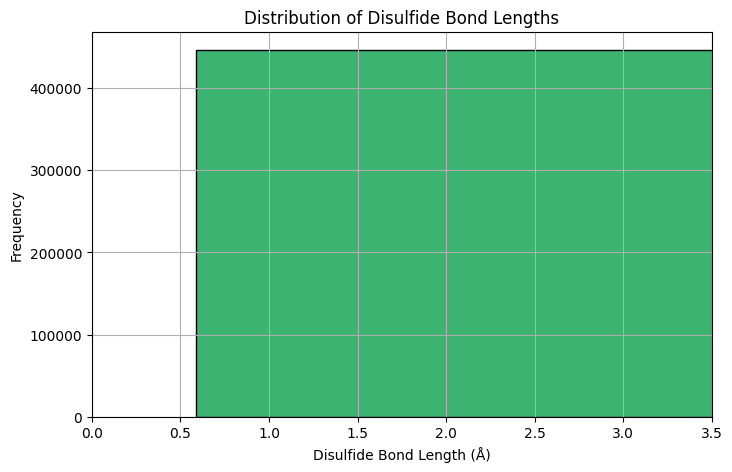

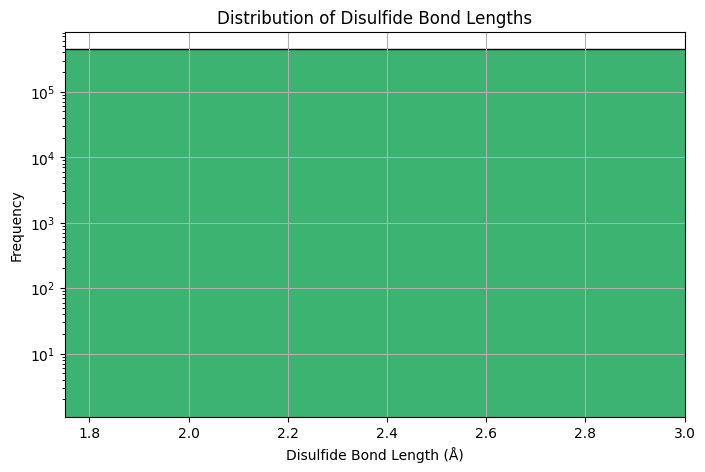

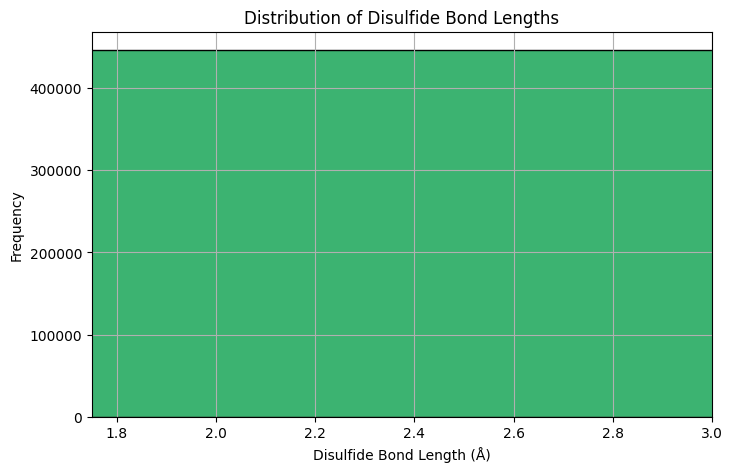

Number of disulfide bonds detected: 446277


In [17]:
import gemmi
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
import numpy as np 

# list to store disulfide bond distances
disulfide_lengths = []

# counter for failures
failed_count = 0

# loop through structure files
for path in tqdm(gemmi.CoorFileWalk("/home/olico/repositories/mmCIF_PDB")):
    try:
        structure = gemmi.read_structure(path)

        # get bond annotations 
        conn_list = structure.connections
        for conn in conn_list:
            if conn.type == gemmi.ConnectionType.Disulf:
                # save bond length
                disulfide_lengths.append(conn.reported_distance)

                # printing updates on bonds found to show its working
                if len(disulfide_lengths) % 10000 == 0:
                    print(f"{len(disulfide_lengths)} disulfide bonds found so far...")

    except Exception as e:
        print(f"Failed: {path} | Error: {e}")
        failed_count += 1

print(f"Done! Found {len(disulfide_lengths)} disulfide bonds across PDB. Failed files: {failed_count}")


# Plotting histogram of disulfide bonds

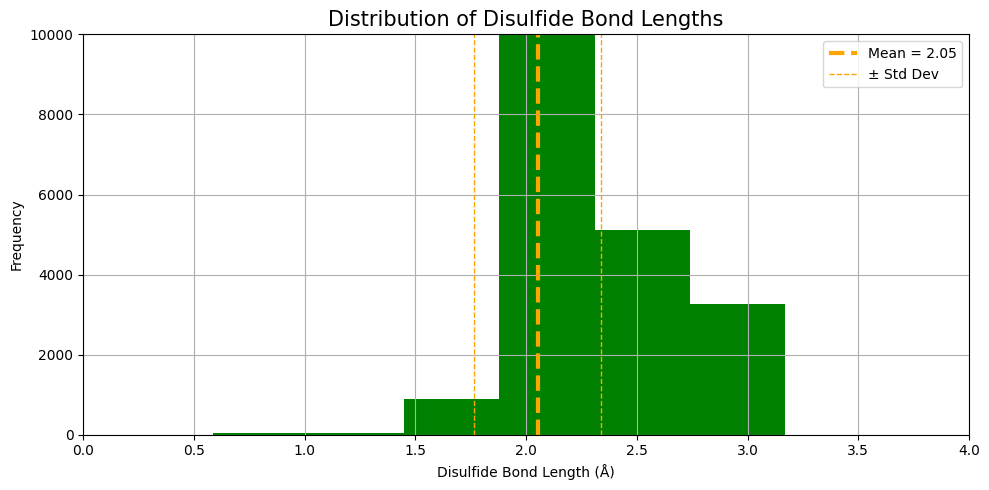

0.587
129.739


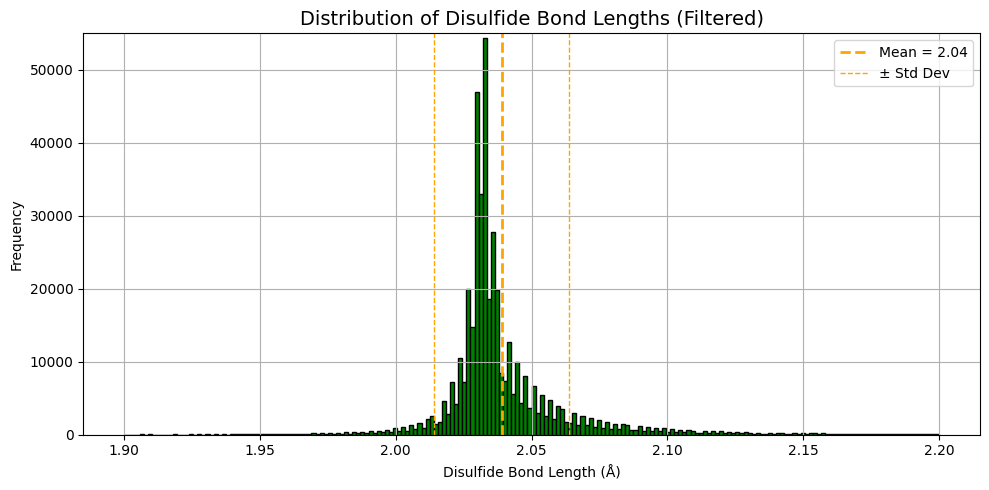

Filtered disulfide bonds (1.9–2.2 Å): 433997
Total disulfide bonds found: 446277


In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

plt.title("Distribution of Disulfide Bond Lengths", fontsize=15)
plt.hist(disulfide_lengths, bins=300, color='green', edgecolor='black)

# calculate mean and std
mean = np.mean(disulfide_lengths)
std = np.std(disulfide_lengths)

# add mean and std to plot 
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=3, label=f'Mean = {mean:.2f}')
plt.axvline(mean - std, color='orange', linestyle='dashed', linewidth=1, label=f'± Std Dev')
plt.axvline(mean + std, color='orange', linestyle='dashed', linewidth=1)

plt.xlabel("Disulfide Bond Length (Å)")
plt.ylabel("Frequency")

# Set axis ranges
plt.xlim(0, 4) 
plt.ylim(0, 10000)  

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print(min(disulfide_lengths))
print(max(disulfide_lengths))
# shows the min length is 0.587 and the max is 129.739 = outliers

# filtering data so histogram is not a block
filtered_bonds = [d for d in disulfide_lengths if 1.9 <= d <= 2.2]

# calculate mean and std
mean = np.mean(filtered_bonds)
std = np.std(filtered_bonds)

plt.figure(figsize=(10, 5))
plt.hist(filtered_bonds, bins=200, color='green', edgecolor='black')

# Add mean and std
plt.axvline(mean, color='orange', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axvline(mean - std, color='orange', linestyle='dashed', linewidth=1, label='± Std Dev')
plt.axvline(mean + std, color='orange', linestyle='dashed', linewidth=1)

plt.title("Distribution of Disulfide Bond Lengths (Filtered)", fontsize=14)
plt.xlabel("Disulfide Bond Length (Å)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 55000)
plt.show()

# how many disulfide bonds are in the filter
print(f"Filtered disulfide bonds (1.9–2.2 Å): {len(filtered_bonds)}")

# how many disulfide bonds are there altogether
print(f"Total disulfide bonds found: {len(disulfide_lengths)}")



# Making a dictionary and list of anomalous disulfide bonds

In [ ]:
import gemmi
import json
from tqdm.notebook import tqdm

anomalous_disulfides = []
failed_count = 0

# extract disulfide bonds
for path in tqdm(gemmi.CoorFileWalk("/home/olico/repositories/mmCIF_PDB")): 
    try:
        structure = gemmi.read_structure(path)
        conn_list = structure.connections
        pdb_id = structure.name.upper()

        for conn in conn_list:
            if conn.type == gemmi.ConnectionType.Disulf:
                if conn.reported_distance < 1.9 or conn.reported_distance > 2.2:
                    bond = {
                        "pdb_id": pdb_id,
                        "residue1": {
                            "chain": conn.partner1.chain_name
                        },
                        "residue2": {
                            "chain": conn.partner2.chain_name
                        },
                        "distance": conn.reported_distance
                    }
                    anomalous_disulfides.append(bond)

                    if len(anomalous_disulfides) % 100 == 0:
                        print(f"{len(anomalous_disulfides)} disulfide anomalies found so far...")



    except Exception as e:
        print(f"Failed: {path} | Error: {e}")
        failed_count += 1

# Save to JSON
with open("anomalous_disulfides.json", "w") as f:
    json.dump(anomalous_disulfides, f, indent=2)

print("Done!")
print(f"Total anomalous disulfide bonds: {len(anomalous_disulfides)}")
print(f"Failed counts: {failed_count}")

0it [00:00, ?it/s]

100 disulfide anomalies found so far...


In [3]:
import gemmi
import json
from tqdm.notebook import tqdm

# Set batch number (0–5 for 6 batches of 40,000)
batch_number = 0
batch_size = 40000

# Load all mmCIF file paths
all_paths = list(gemmi.CoorFileWalk("/home/olico/repositories/mmCIF_PDB"))
batches = [all_paths[i:i + batch_size] for i in range(0, len(all_paths), batch_size)]
paths = batches[batch_number]

anomalous_disulfides = []
failed_count = 0

# Extract disulfide bonds
for path in tqdm(paths):
    try:
        structure = gemmi.read_structure(path)
        conn_list = structure.connections
        pdb_id = structure.name.upper()

        for conn in conn_list:
            if conn.type == gemmi.ConnectionType.Disulf:
                distance = conn.reported_distance
                if distance < 1.9 or distance > 2.2:
                    bond = {
                        "pdb_id": pdb_id,
                        "residue1": {
                            "chain": conn.partner1.chain_name
                        },
                        "residue2": {
                            "chain": conn.partner2.chain_name
                        },
                        "distance": distance
                    }
                    anomalous_disulfides.append(bond)

                    if len(anomalous_disulfides) % 100 == 0:
                        print(f"{len(anomalous_disulfides)} disulfide anomalies found so far...")

    except Exception as e:
        print(f"Failed: {path} | Error: {e}")
        failed_count += 1

# Save to JSON file named by batch
output_file = f"anomalous_disulfides_batch_{batch_number}.json"
with open(output_file, "w") as f:
    json.dump(anomalous_disulfides, f, indent=2)

# Final output
print("✅ Done!")
print(f"Batch {batch_number}: {len(anomalous_disulfides)} anomalous disulfide bonds saved to {output_file}")
print(f"Failed files: {failed_count}")

  0%|          | 0/40000 [00:00<?, ?it/s]

100 disulfide anomalies found so far...
200 disulfide anomalies found so far...
300 disulfide anomalies found so far...
400 disulfide anomalies found so far...
500 disulfide anomalies found so far...
600 disulfide anomalies found so far...
700 disulfide anomalies found so far...
800 disulfide anomalies found so far...
900 disulfide anomalies found so far...
1000 disulfide anomalies found so far...
1100 disulfide anomalies found so far...
1200 disulfide anomalies found so far...
1300 disulfide anomalies found so far...
1400 disulfide anomalies found so far...
1500 disulfide anomalies found so far...
1600 disulfide anomalies found so far...
1700 disulfide anomalies found so far...
✅ Done!
Batch 0: 1770 anomalous disulfide bonds saved to anomalous_disulfides_batch_0.json
Failed files: 0
